<a href="https://colab.research.google.com/github/mojoyinkimberly/Predicting_Parkinsons/blob/main/Predicting_Parkingsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the Polynomial features and the Linear regression models to predict the clinician's motor updrs score taken from a telemonitoring device from sixteen different biomedical voice measures for patients with early stage parkinsons disease.

In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import ResidualsPlot
from sklearn.decomposition import PCA


**Reading dataset into the python environment**

In [398]:
p_dataset= pd.read_csv("/content/parkinsons_updrs.data",sep = ",")
p_dataset

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


**Dropping unnecessary columns**

In [399]:
new_p_dataset = p_dataset.drop(columns=['subject#','total_UPDRS'])
new_p_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   motor_UPDRS    5875 non-null   float64
 4   Jitter(%)      5875 non-null   float64
 5   Jitter(Abs)    5875 non-null   float64
 6   Jitter:RAP     5875 non-null   float64
 7   Jitter:PPQ5    5875 non-null   float64
 8   Jitter:DDP     5875 non-null   float64
 9   Shimmer        5875 non-null   float64
 10  Shimmer(dB)    5875 non-null   float64
 11  Shimmer:APQ3   5875 non-null   float64
 12  Shimmer:APQ5   5875 non-null   float64
 13  Shimmer:APQ11  5875 non-null   float64
 14  Shimmer:DDA    5875 non-null   float64
 15  NHR            5875 non-null   float64
 16  HNR            5875 non-null   float64
 17  RPDE           5875 non-null   float64
 18  DFA     

**checking for missing values**

In [400]:
new_p_dataset.isna().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

**checking for outliers using the describe function**

In [401]:
new_p_dataset.describe()

,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,21.296229,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,0.465656,53.445602,8.129282,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,0.000000,-4.262500,5.037700,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,0.000000,46.847500,15.000000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,0.000000,91.523000,20.871000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,1.000000,138.445000,27.596500,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,1.000000,215.490000,39.511000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


**Fixing outliers**

In [402]:
new_p_dataset['age'] = np.where(new_p_dataset['age'] < 58.000000, 65.000000, new_p_dataset['age'])
new_p_dataset['Jitter(%)'] = np.where(new_p_dataset['Jitter(%)'] > 0.006800, 0.004900, new_p_dataset['Jitter(%)'])
new_p_dataset['Jitter(Abs)'] = np.where(new_p_dataset['Jitter(Abs)'] > 0.000053, 0.000035, new_p_dataset['Jitter(Abs)'])
new_p_dataset['Jitter:RAP'] = np.where(new_p_dataset['Jitter:RAP'] > 0.003290, 0.002250, new_p_dataset['Jitter:RAP'])
new_p_dataset['Jitter:PPQ5'] = np.where(new_p_dataset['Jitter:PPQ5'] > 0.003460, 0.002490, new_p_dataset['Jitter:PPQ5'])
new_p_dataset['Jitter:DDP'] = np.where(new_p_dataset['Jitter:DDP'] > 0.009870, 0.006750, new_p_dataset['Jitter:DDP'])
new_p_dataset['Shimmer'] = np.where(new_p_dataset['Shimmer'] > 0.039750, 0.027510, new_p_dataset['Shimmer'])
new_p_dataset['Shimmer(dB)'] = np.where(new_p_dataset['Shimmer(dB)'] > 0.365000, 0.253000, new_p_dataset['Shimmer(dB)'])
new_p_dataset['Shimmer:APQ3'] = np.where(new_p_dataset['Shimmer:APQ3'] > 0.020575, 0.013700, new_p_dataset['Shimmer:APQ3'])
new_p_dataset['Shimmer:APQ5'] = np.where(new_p_dataset['Shimmer:APQ5'] > 0.023755, 0.015940, new_p_dataset['Shimmer:APQ5'])
new_p_dataset['Shimmer:APQ11'] = np.where(new_p_dataset['Shimmer:APQ11'] > 0.032715, 0.022710, new_p_dataset['Shimmer:APQ11'])
new_p_dataset['Shimmer:DDA'] = np.where(new_p_dataset['Shimmer:DDA'] > 0.061735, 0.041110, new_p_dataset['Shimmer:DDA'])
new_p_dataset['NHR'] = np.where(new_p_dataset['NHR'] > 0.031463, 0.018448, new_p_dataset['NHR'])
new_p_dataset['HNR'] = np.where(new_p_dataset['HNR'] > 24.444000, 21.920000, new_p_dataset['HNR'])
new_p_dataset['HNR'] = np.where(new_p_dataset['HNR'] < 19.406000, 21.920000, new_p_dataset['HNR'])
new_p_dataset['RPDE'] = np.where(new_p_dataset['RPDE'] > 0.614045, 0.542250, new_p_dataset['RPDE'])
new_p_dataset['RPDE'] = np.where(new_p_dataset['RPDE'] < 0.469785, 0.542250, new_p_dataset['RPDE'])
new_p_dataset['PPE'] = np.where(new_p_dataset['PPE'] > 0.264490, 0.205500, new_p_dataset['PPE'])

**checking for the relationship between variables**

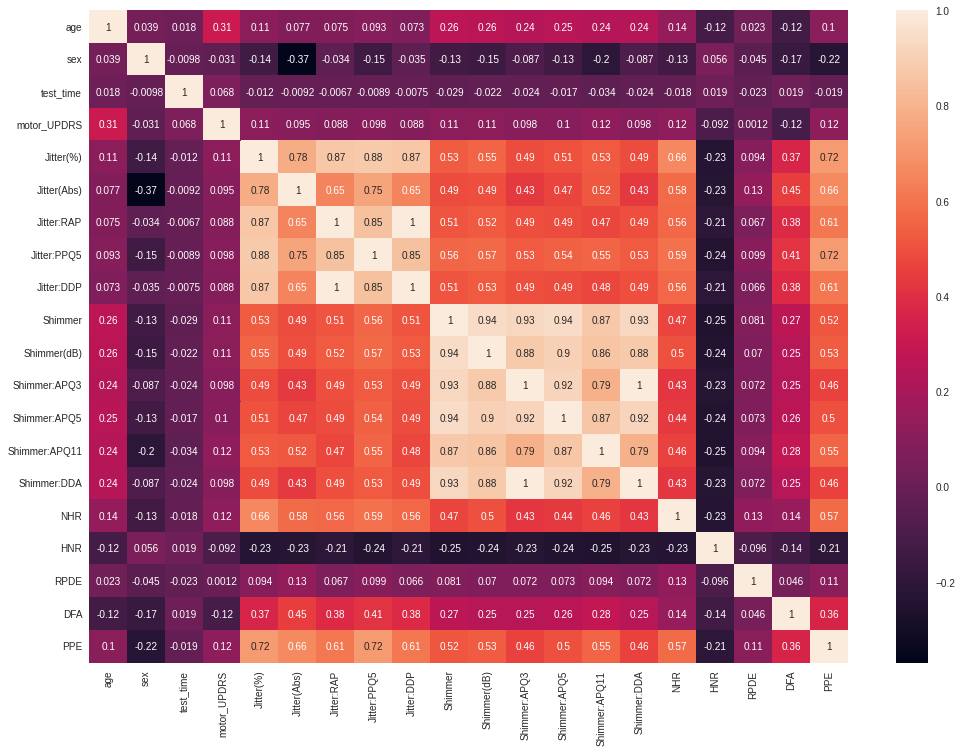

In [403]:
plt.figure(figsize=(17,12))
sns.heatmap(new_p_dataset.corr(), annot=True)

**splitting dataset into dependent and independent variables**

In [404]:
y = new_p_dataset['motor_UPDRS']
x = new_p_dataset.drop(['motor_UPDRS','Jitter:DDP','Shimmer:DDA','Shimmer:APQ5','RPDE','Jitter(%)','Jitter:RAP','Shimmer','Shimmer(dB)','Shimmer:APQ11','HNR','PPE'], axis =1)

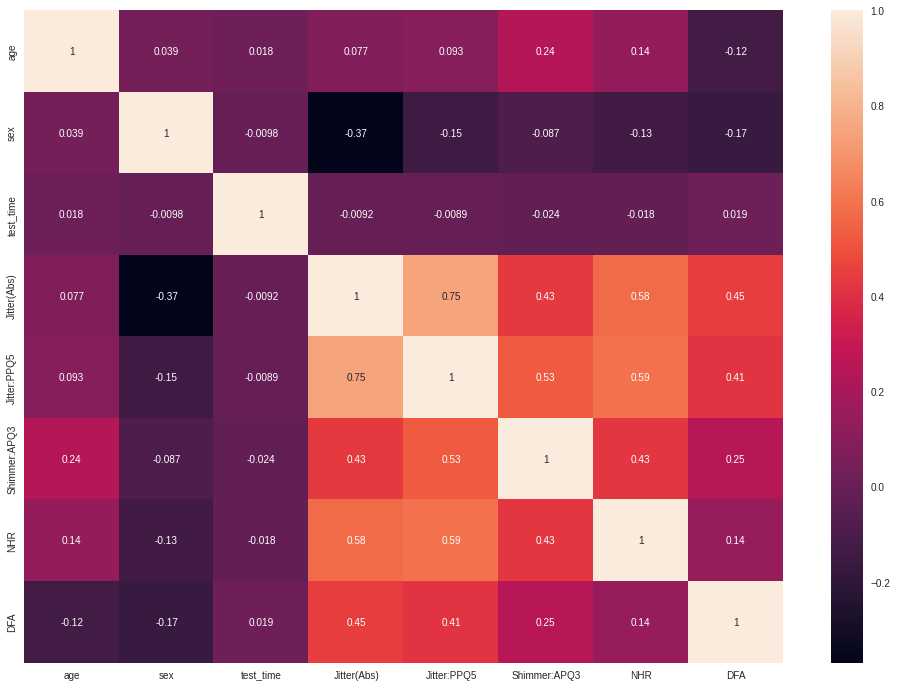

In [405]:
plt.figure(figsize=(17,12))
sns.heatmap(x.corr(), annot=True)

**checking for multicollinearity**

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calcu_mult(df):
  vif = pd.DataFrame()
  vif["variables"] = x.columns
  vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return vif

In [407]:
calcu_mult(x)

,variables,VIF
0,age,53.215415
1,sex,1.788723
2,test_time,4.007197
3,Jitter(Abs),28.421860
4,Jitter:PPQ5,43.726572
5,Shimmer:APQ3,16.071562
6,NHR,11.403985
7,DFA,62.862452


**Splitting the dataset into train and test and then redoing the split for validation test**

In [408]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=45)

**splitting normalized dataset into validation**

In [409]:
normal_data = MinMaxScaler()
scaler = pd.DataFrame(normal_data.fit_transform(X_train))

In [410]:
X_train_, X_val, y_train_, y_val = train_test_split(scaler, y_train, test_size=0.25, random_state=1)


Depicting dimensionality reduction techniques using Random Forest.This shows the important variables that affect the dependent variable.All other variables should be dropped if found unimportant.

In [411]:
model = RandomForestRegressor(random_state=1, max_depth=4)
model.fit(X_train_, y_train_)

RandomForestRegressor(max_depth=4, random_state=1)

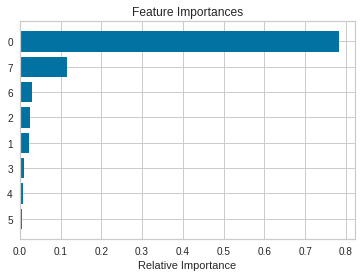

In [412]:
features = scaler.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-8:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [413]:
ln_features_ = PolynomialFeatures(degree = 6, include_bias=False)
model_fit_ = ln_features_.fit_transform(scaler)

In [414]:
ln_features_x = ln_features_.fit_transform(X_test)

In [415]:
ln_model = LinearRegression()
ln_result = ln_model.fit(model_fit_, y_train)

In [416]:
ln_result.score(model_fit_, y_train)

0.8116470397451936

In [417]:
1 - (1-ln_result.score(model_fit_,y_train))*(len(y_train)-1)/(len(y_train)-model_fit_.shape[1]-1)

0.4784498761123539

In [418]:
intercept = ln_result.coef_
intercept

array([ 3.83044049e+01,  4.22316274e+13, -6.41051524e+00, ...,
        6.04302979e+03, -5.93011377e+03,  4.19768652e+03])

In [419]:
y_predict =ln_result.predict(ln_features_x)
y_predict

array([ 1.44092190e+16,  7.44006656e+14,  6.18554983e+13, ...,
        1.09384995e+15,  1.60640817e+15, -7.85535279e+14])